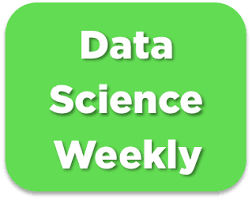

# Challenge : predict conversions 🏆🏆

This is the template that shows the different steps of the challenge. In this notebook, all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the preprocessing/training steps to get the model with the best f1-score ! May the force be with you 🧨🧨  

**For a detailed description of this project, please refer to *02-Conversion_rate_challenge.ipynb*.**

# Import libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE
from IPython.display import display

# Read file with labels

In [2]:
data = pd.read_csv('conversion_data_train.csv')
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284580, 6)


In [3]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [4]:
# Basic stats
print("Number of rows : {}".format(data.shape[0]))
print("Number of columns : {}".format(data.shape[1]))
print()

print("Basics statistics: ")
data_desc = data.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*data.isnull().sum()/data.shape[0])

print()
display(data.info())

Number of rows : 284580
Number of columns : 6

Basics statistics: 


,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000



Percentage of missing values: 


country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB


None

# Explore dataset

In [5]:
# The dataset is quite big : you must create a sample of the dataset before making any visualizations !
data_sample = data.sample(10000)

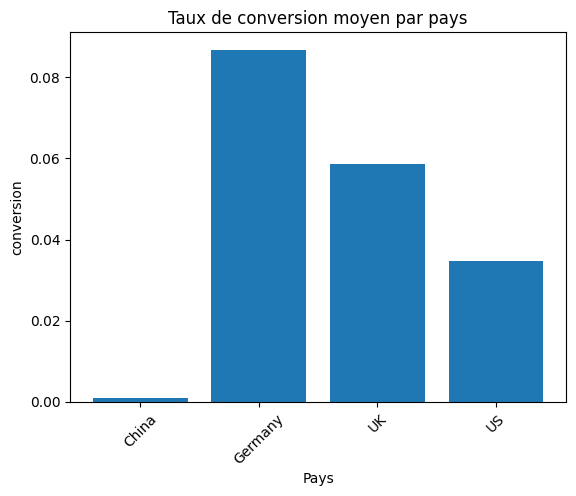

In [6]:
import matplotlib.pyplot as plt

conversion_by_visit = data_sample.groupby('country')['converted'].mean()

plt.bar(conversion_by_visit.index, conversion_by_visit)
plt.xlabel('Pays')
plt.ylabel('conversion')
plt.title('Taux de conversion moyen par pays')
plt.xticks(rotation=45)
plt.show()

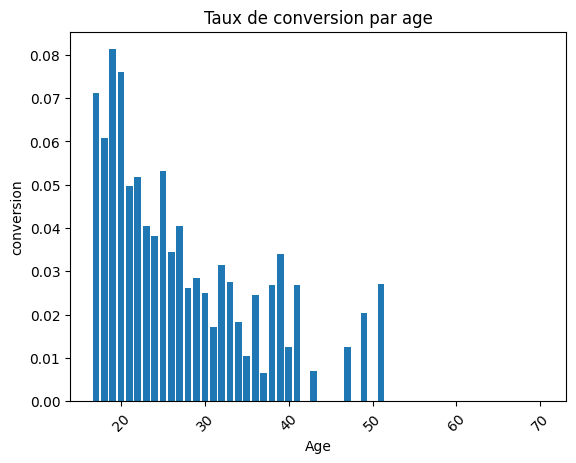

In [7]:
conversion_by_age = data_sample.groupby('age')['converted'].mean()

plt.bar(conversion_by_age.index, conversion_by_age)
plt.xlabel('Age')
plt.ylabel('conversion')
plt.title('Taux de conversion par age')
plt.xticks(rotation=45)
plt.show()

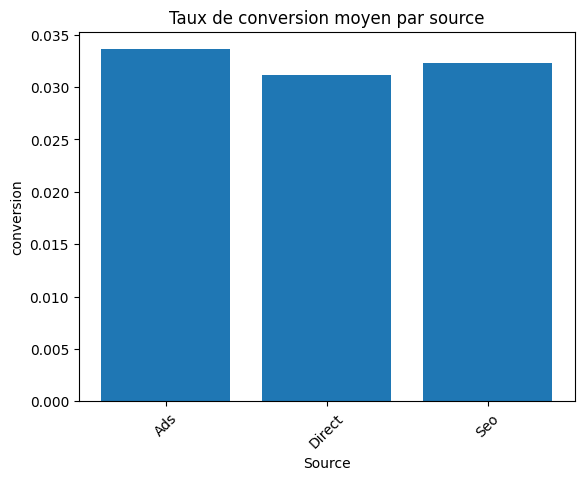

In [8]:
conversion_by_source = data_sample.groupby('source')['converted'].mean()

plt.bar(conversion_by_source.index, conversion_by_source)
plt.xlabel('Source')
plt.ylabel('conversion')
plt.title('Taux de conversion moyen par source')
plt.xticks(rotation=45)
plt.show()

# Prerocessing


In [9]:
column_names = data.columns
print(column_names)

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')


In [10]:

features_list = ['country','age','new_user','source','total_pages_visited']
target_variable = ['converted']

numeric_features = [1,4]
categorical_features = [0,2,3]

In [11]:
X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['country', 'age', 'new_user', 'source', 'total_pages_visited'], dtype='object')



In [12]:
# Divide dataset Train set & Test set
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify = Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



## Training pipeline

In [13]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[['China' 19 1 'Seo' 1]
 ['US' 33 1 'Direct' 5]
 ['US' 51 1 'Ads' 2]
 ['China' 17 0 'Seo' 1]
 ['China' 28 1 'Seo' 5]]
[['UK' 34 1 'Ads' 1]
 ['UK' 32 0 'Ads' 5]]

[[0]
 [0]
 [0]
 [0]
 [0]]
[[0]
 [0]]


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder


# Create pipeline for numeric features
numeric_features = [1, 4] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # if still missing values we will replace by columns' mean
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_features = [0, 2, 3] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # if still missing values we will replace by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [15]:
from sklearn.compose import ColumnTransformer

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [16]:
# Preprocessings on train set and test set
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

Regression Logistique


In [17]:
# Train model
print("Train model...")
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



...Done.


In [18]:
# Predictions on training set
y_train_pred = classifier.predict(X_train)
# Predictions on test set
y_test_pred = classifier.predict(X_test)

print("f1-score on train set :  ", f1_score(Y_train, y_train_pred))
print("f1-score on test set :  ", f1_score(Y_test, y_test_pred))

f1-score on train set :   0.7654507084715104
f1-score on test set :   0.7554347826086957


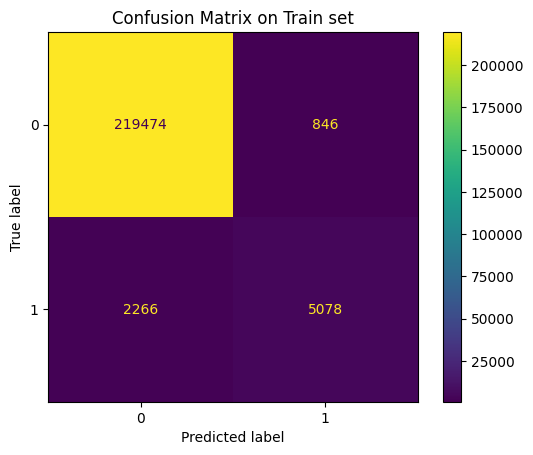

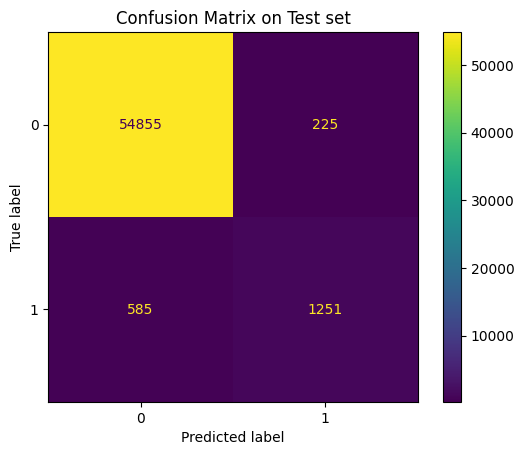

In [19]:
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay


# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

MATRICE DE CONFUSION




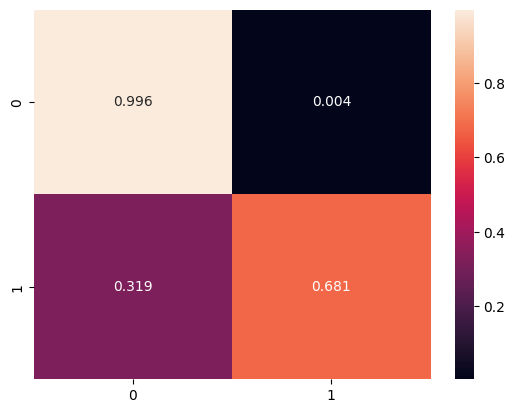

In [25]:
import seaborn as sns
print('Matrice de Confusion en Pourcentage')
print()
print()
cm = confusion_matrix(Y_test, y_test_pred, normalize="true")
sns.heatmap(cm, annot=True, fmt=".3f");

In [20]:
# Concatenating our train and test set to train the best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

classifier.fit(X,Y)

LogisticRegression()

In [21]:
# Reading data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')

In [22]:
# # Checking consistency of features_list (must be the same than the features used by the best classifier), OK
features_list = ['country', 'age', 'new_user', 'source', 'total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

In [23]:
X_without_labels = preprocessor.transform(X_without_labels)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SimpleImputer was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SimpleImputer was fitted without feature names



In [24]:

# Making predictions and dumping to file
data = {'converted': classifier.predict(X_without_labels)}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_RegLog.csv', index=False)

In [26]:
Y_predictions.head()


,converted
0,1
1,0
2,0
3,0
4,0
